In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

## โหลดและเตรียมข้อมูล Iris Dataset 
📌 Iris Dataset มีฟีเจอร์ 4 ตัว

Sepal Length<br>
Sepal Width<br>
Petal Length<br>
Petal Width


In [7]:
# โหลดข้อมูล
iris = load_iris()
X = iris.data  # Features
y = to_categorical(iris.target)  # แปลง Target เป็น One-Hot Encoding

# แบ่งข้อมูลเป็น Train (80%) และ Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# แสดงตัวอย่างข้อมูล
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (120, 4), y_train shape: (120, 3)
X_test shape: (30, 4), y_test shape: (30, 3)


## สร้างโมเดล Neural Network
📌 สร้างโมเดลแบบ Sequential (เรียงชั้น Layer) <br>
📌 ใช้ Activation Function ReLU และ Softmax

In [8]:
#สร้างโมเดล
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),  # Hidden Layer 1 (8 Neurons)
    Dense(8, activation='relu'),  # Hidden Layer 2
    Dense(3, activation='softmax')  # Output Layer (3 Classes)
])

📌 อธิบายโครงสร้างของโมเดล

-Layer 1 (Hidden Layer 1) → มี 8 Neurons และใช้ ReLU Activation<br>
-Layer 2 (Hidden Layer 2) → มี 8 Neurons และใช้ ReLU Activation<br>
-Layer 3 (Output Layer) → มี 3 Neurons (เพราะมี 3 คลาส) และใช้ Softmax<br>
<br>
💡 ReLU → ใช้ใน Hidden Layer (ช่วยลดปัญหา Gradient Vanishing)
💡 Softmax → ใช้ใน Output Layer (เหมาะกับ Multi-Class Classification)
💡 ReLU → ใช้ใน Hidden Layer (ช่วยลดปัญหา Gradient Vanishing)<br>
💡 Softmax → ใช้ใน Output Layer (เหมาะกับ Multi-Class Classification)

In [9]:
#คอมไพล์โมเดล
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# แสดงโครงสร้างของโมเดล
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


## เทรนโมเดล

In [11]:
# เทรนโมเดล
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 30ms/step - loss: 1.7636 - accuracy: 0.3417 - val_loss: 1.6630 - val_accuracy: 0.3000
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 1.5757 - accuracy: 0.3417 - val_loss: 1.4907 - val_accuracy: 0.3000
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 1.4292 - accuracy: 0.3417 - val_loss: 1.3687 - val_accuracy: 0.3000
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.3188 - accuracy: 0.3417 - val_loss: 1.2727 - val_accuracy: 0.3000
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2336 - accuracy: 0.3417 - val_loss: 1.1880 - val_accuracy: 0.3000
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 1.1596 - accuracy: 0.3417 - val_loss: 1.1158 - val_accuracy: 0.3000
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 1.0926 - accuracy: 0.3417 - val_loss: 1.0538 - val_accuracy: 0.3000
Epoch 8/100


## ประเมินผลโมเดล

In [12]:
# ทดสอบโมเดล
loss, accuracy = model.evaluate(X_test, y_test)
print(f"📊 Test Accuracy: {accuracy:.2f}")

1/1 [==============================] - 0s 61ms/step - loss: 0.0912 - accuracy: 1.0000
📊 Test Accuracy: 1.00


## แสดงกราฟ Loss และ Accuracy

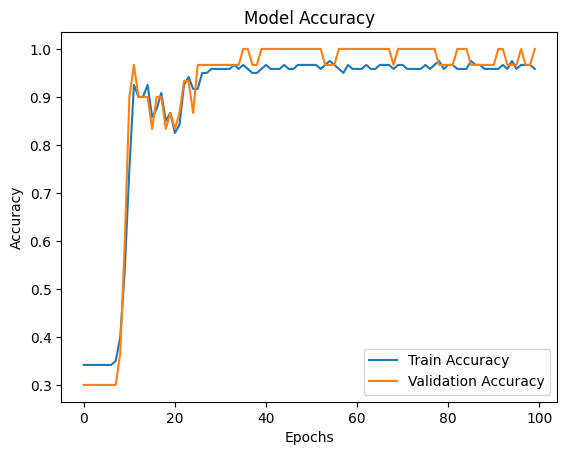

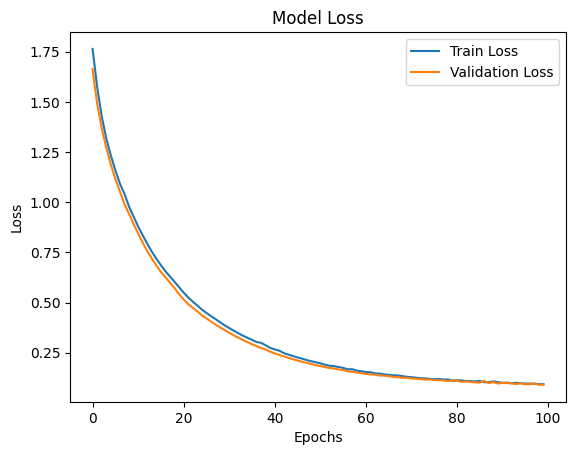

In [14]:
import matplotlib.pyplot as plt

# แสดงกราฟ Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# แสดงกราฟ Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


## ทำนายดอกไม้ใหม่

In [15]:
# ข้อมูลตัวอย่างของดอกไม้ใหม่
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # ค่าของ Sepal & Petal

# ทำนายผล
prediction = model.predict(new_flower)

# แสดงผลลัพธ์
predicted_species = iris.target_names[np.argmax(prediction)]
print(f"🌸 โมเดลทำนายว่าเป็นสายพันธุ์: {predicted_species}")


1/1 [==============================] - 0s 103ms/step
🌸 โมเดลทำนายว่าเป็นสายพันธุ์: setosa
